In [2]:
# Load libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Data Exploration

In [3]:
data = pd.read_csv("C:\\Users\\Yogesh\\OneDrive - Aureus Analytics\\Assignment\Data\\bank-additional-full.csv",sep =';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [10]:
#checking for missing values in dataset
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Univariate Analysis

Analysis of dependent variable - y 

In [11]:
#Frequency of 'y'
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

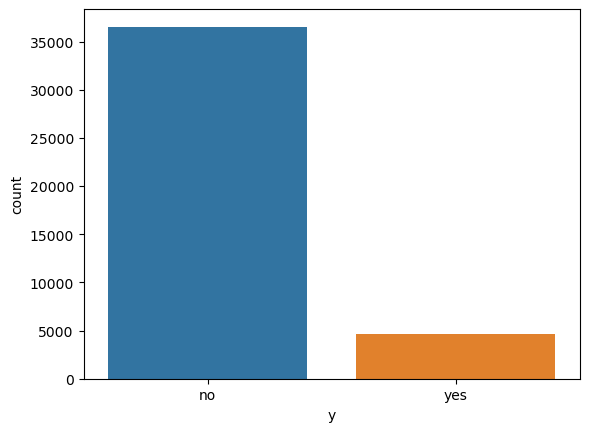

In [12]:
# Plotting the 'subscribed' frequency
sns.countplot(data=data,x='y')

In [13]:
#Normalizing the frequency table of 'y' variable
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

Analysing the 'Job' variable

In [14]:
#Frequency table
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

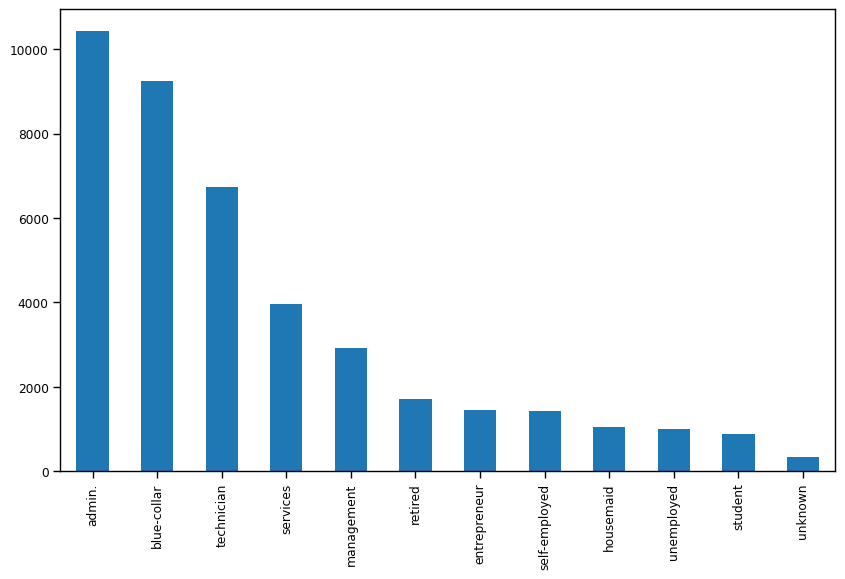

In [15]:
# Plotting the job frequency table
sns.set_context('paper')
data['job'].value_counts().plot(kind='bar', figsize=(10,6));

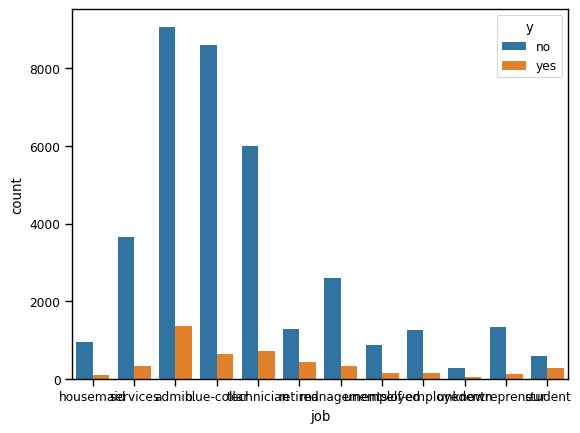

In [16]:
sns.countplot(data=data, x='job', hue='y');

<AxesSubplot:xlabel='count', ylabel='job'>

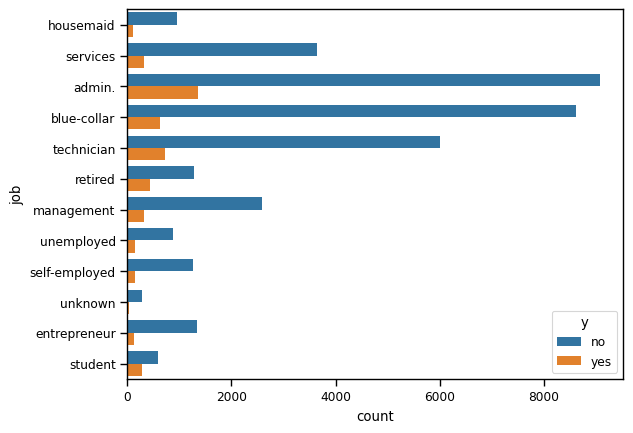

In [17]:
sns.countplot(data=data, y="job", hue="y")

Analysing Marital variable

<AxesSubplot:xlabel='count', ylabel='marital'>

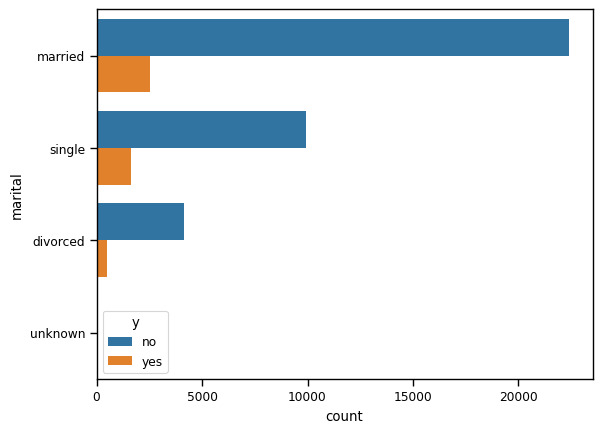

In [18]:
sns.countplot(data=data, y="marital", hue="y")

<AxesSubplot:xlabel='marital', ylabel='count'>

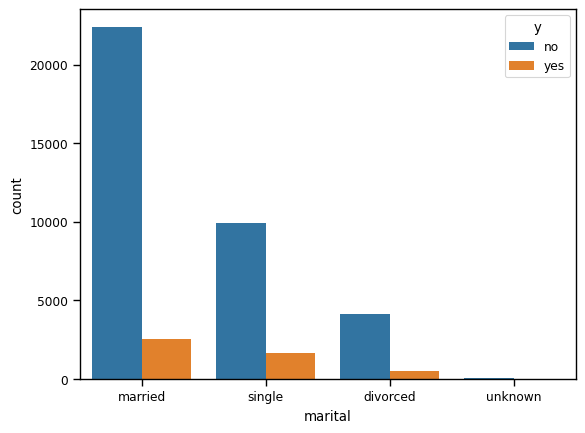

In [19]:
sns.countplot(data=data, x="marital", hue="y")

<AxesSubplot:xlabel='count', ylabel='education'>

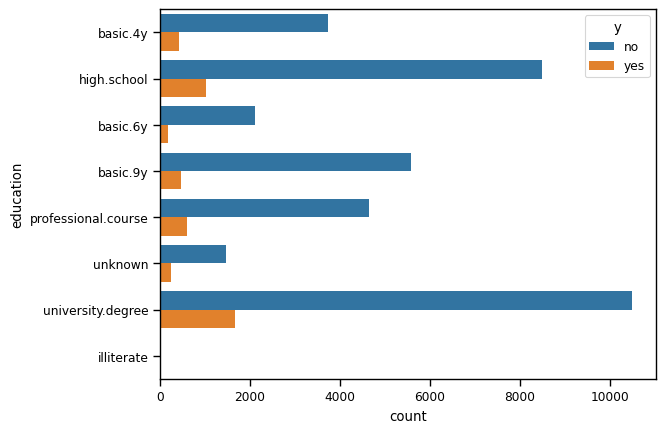

In [20]:
sns.countplot(data=data, y="education", hue="y")

<AxesSubplot:xlabel='count', ylabel='default'>

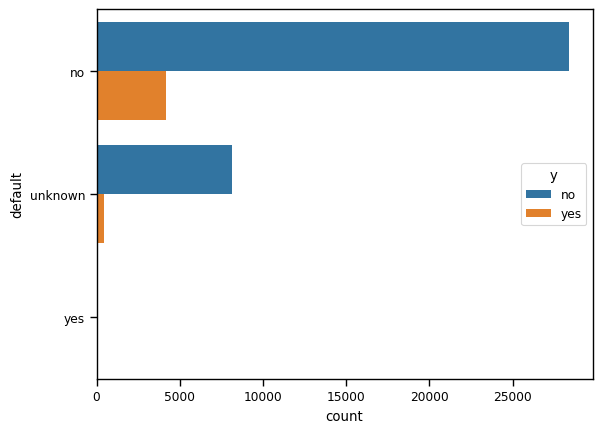

In [21]:
sns.countplot(data=data, y="default", hue="y")

<AxesSubplot:xlabel='count', ylabel='housing'>

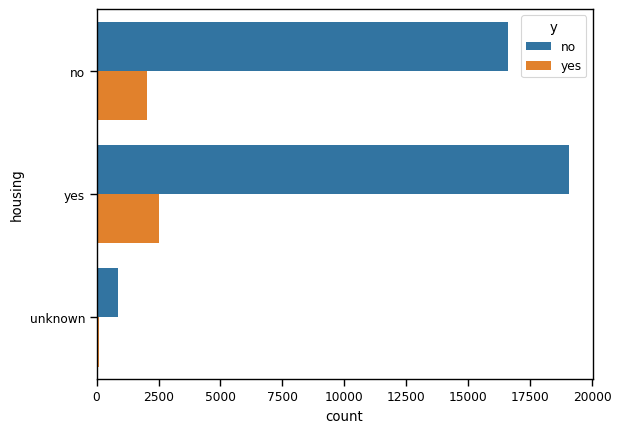

In [22]:
sns.countplot(data=data, y="housing", hue="y")

<AxesSubplot:xlabel='count', ylabel='loan'>

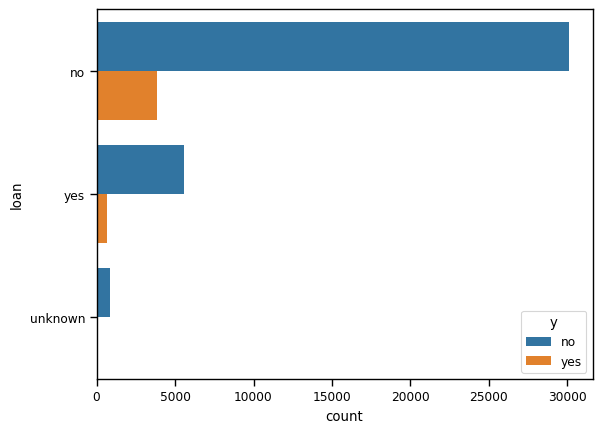

In [23]:
sns.countplot(data=data, y="loan", hue="y")

<AxesSubplot:xlabel='count', ylabel='contact'>

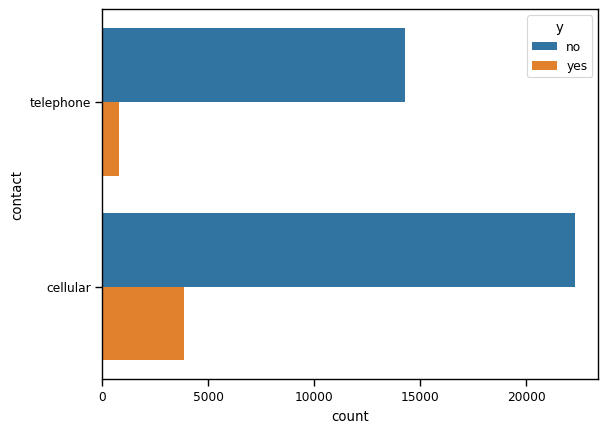

In [24]:
sns.countplot(data=data, y="contact", hue="y")

<AxesSubplot:xlabel='count', ylabel='month'>

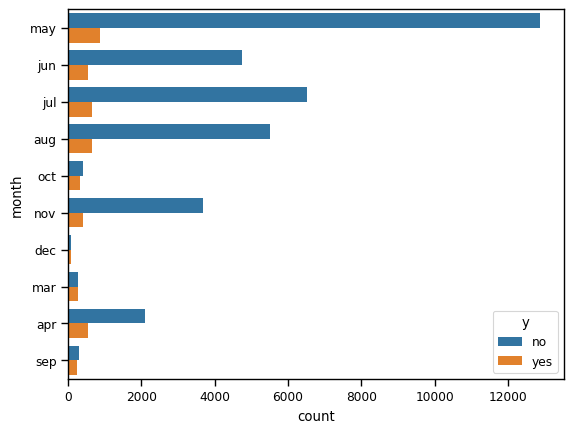

In [25]:
sns.countplot(data=data, y="month", hue="y")

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

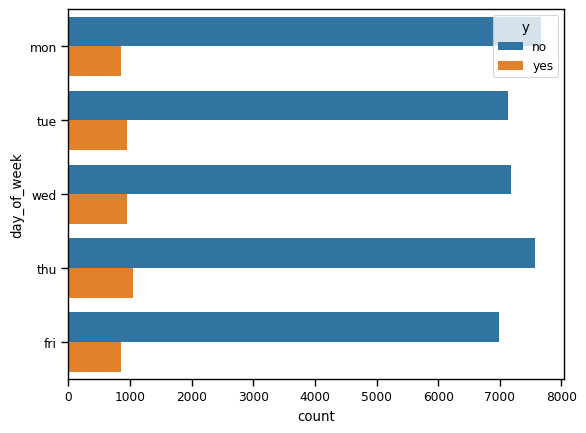

In [26]:
sns.countplot(data=data, y="day_of_week", hue="y")

<AxesSubplot:xlabel='count', ylabel='poutcome'>

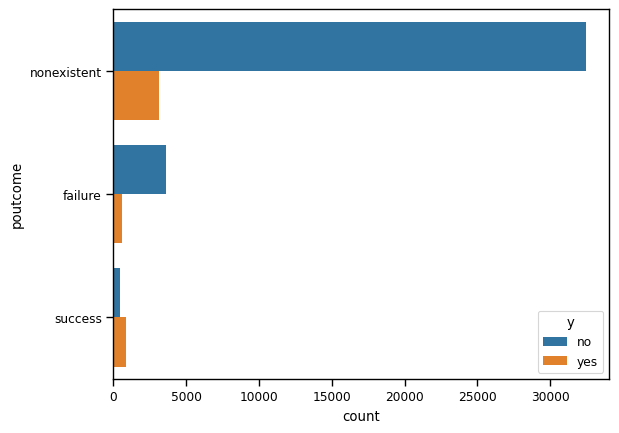

In [27]:
sns.countplot(data=data, y="poutcome", hue="y")

Input Categorical feature Observation
Job - More Job types are Admin , Technician and blue-collor and it means bank targeting high salaried people.
2)Marital - more people of type married

3)Education - more count in university.degree people . of course High salaried people should have university degree
expected. And illiterate count is very less.

4) default - most people have no credit default ,which means they can be approched .

5) housing - we must give more importance to people who have not taken any housing loan.

6)loan - we must give more importance to people who have not taken any personnel loan.

7) month - Seems May is busy season

8) Day_of_week - Seems every day is busy but not on weekends.

9) p_outcome -outcome of the previous marketing campaign- Success is small rate. 

In [28]:
#Correlation matrix
tc = data.corr()
tc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

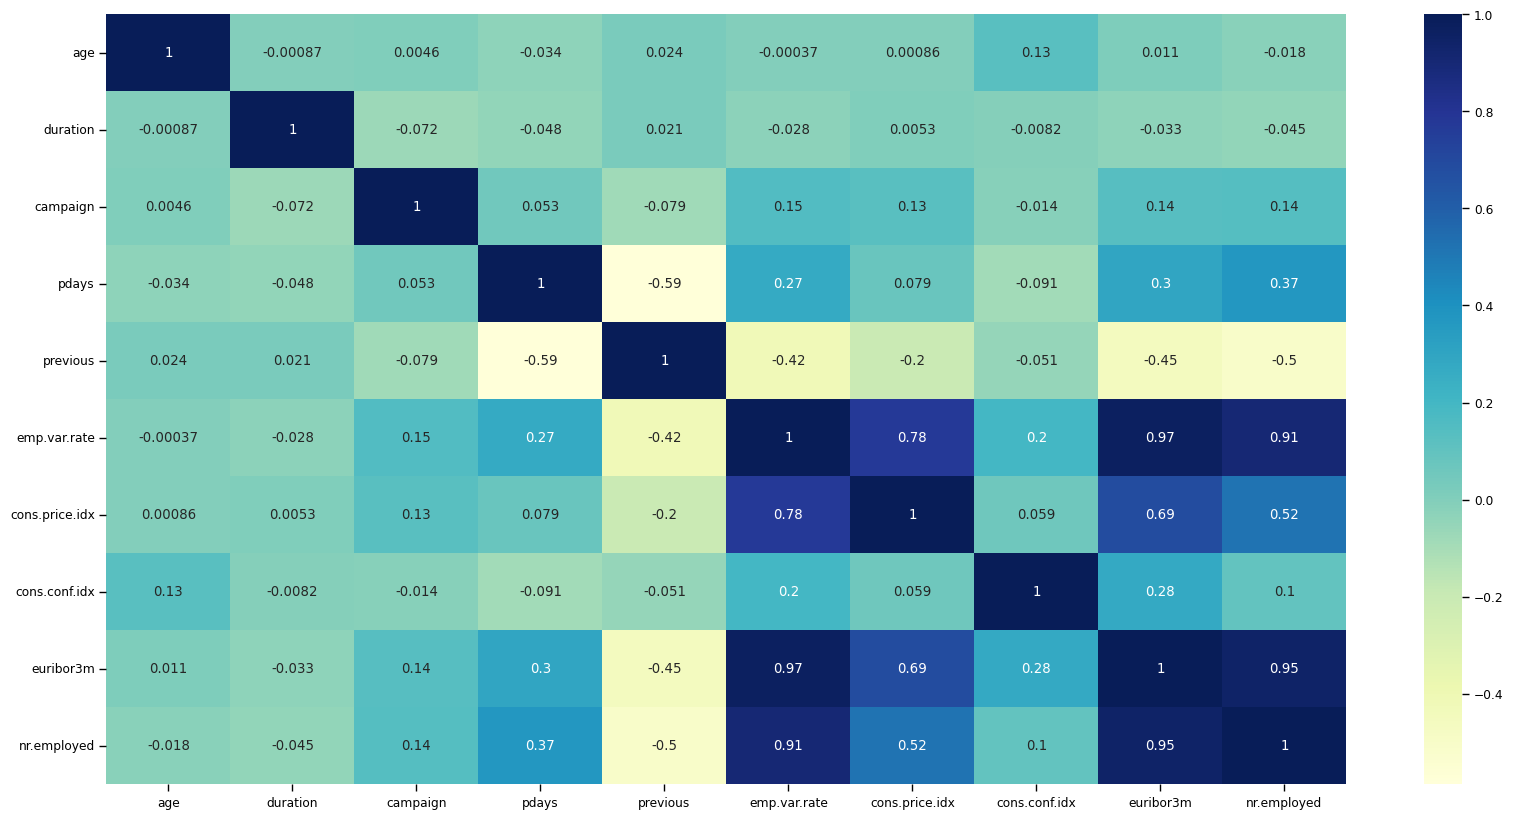

In [29]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

In [30]:
# Converting the target variables into 0s and 1s
data['y'].replace('no', 0,inplace=True)
data['y'].replace('yes', 1,inplace=True)

In [31]:
#Correlation matrix
tc = data.corr()
tc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<AxesSubplot:>

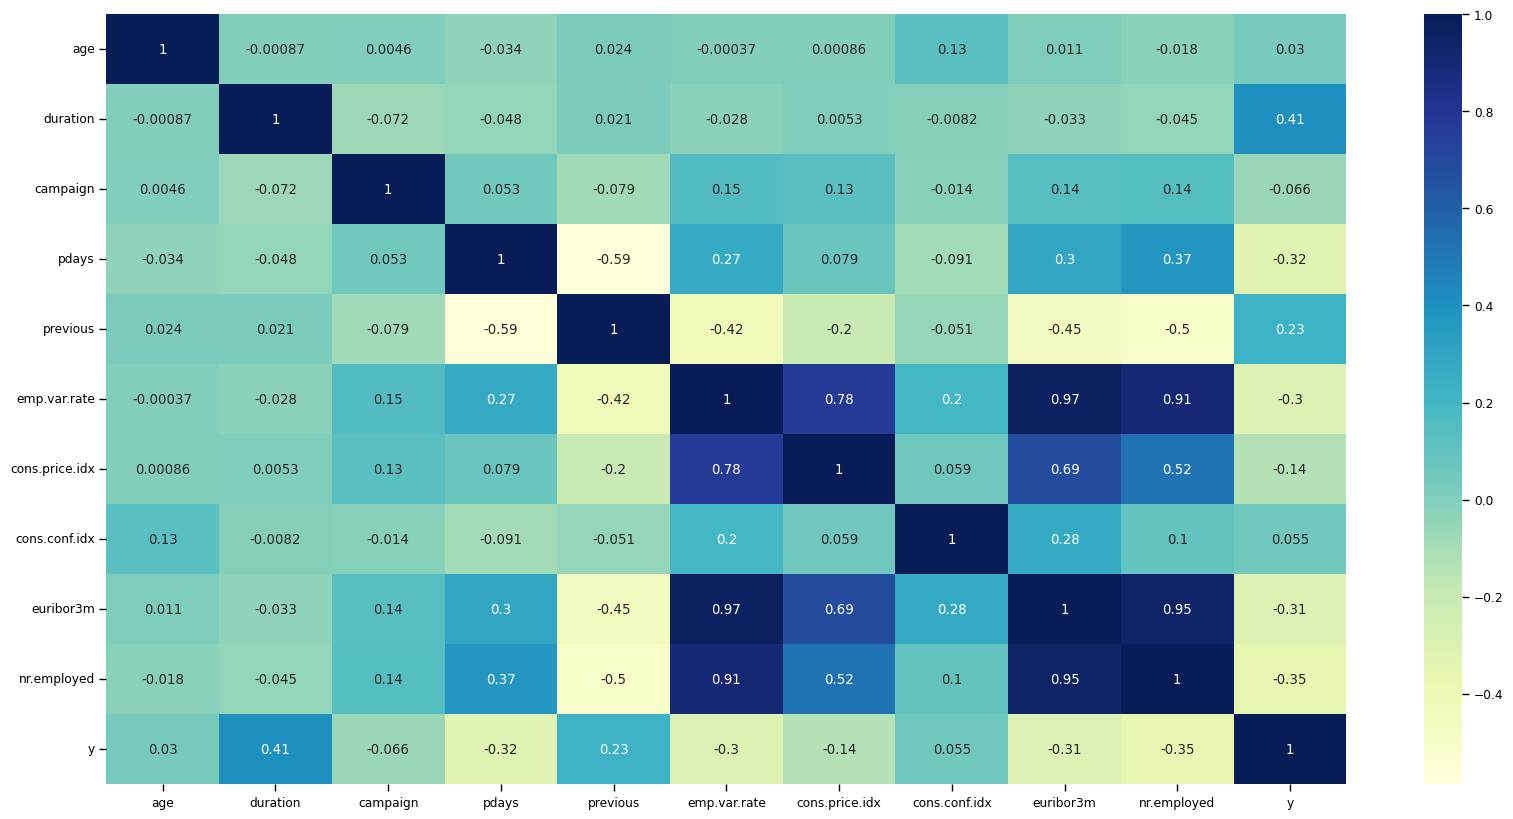

In [32]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

Numerical Variable Observation

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

emp.var.rate is highly correlated with nr.employed ,euribor3m,cons.price.idx we can drop and keep either one of them as they show relationship with each other .We can keep nr.employed as it is showing negative correlation with y 

pdays - Also shows negative correlation with y





In [33]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# Selecting columns 
# job ,marital,education,default,housing, loan,contact,month,day_of_week,poutcome,duration,previous,pdays,nr.employed

In [34]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [35]:
data_cluster = data

In [36]:
data_cluster.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [37]:
data_cluster = data[["job", "marital","education","default","housing","loan","contact","month","day_of_week","poutcome",
                     "duration","previous","pdays","nr.employed"]]

In [38]:
data_cluster

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,duration,previous,pdays,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,261,0,999,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,149,0,999,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,226,0,999,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,151,0,999,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,307,0,999,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,334,0,999,4963.6
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,383,0,999,4963.6
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,189,0,999,4963.6
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,442,0,999,4963.6


Standardizing the data

In [39]:
data_cluster.dtypes

job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
month           object
day_of_week     object
poutcome        object
duration         int64
previous         int64
pdays            int64
nr.employed    float64
dtype: object

In [40]:
idx_numeric=[10,11,12,13]
scaler = MinMaxScaler()
data_cluster[data_cluster.columns[idx_numeric]] = scaler.fit_transform(data_cluster[data_cluster.columns[idx_numeric]])

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_19712\4139430484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster[data_cluster.columns[idx_numeric]] = scaler.fit_transform(data_cluster[data_cluster.columns[idx_numeric]])


In [41]:
data_cluster.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,duration,previous,pdays,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0.053070,0.0,1.0,0.859735
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0.030297,0.0,1.0,0.859735
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0.045954,0.0,1.0,0.859735
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0.030704,0.0,1.0,0.859735
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0.062424,0.0,1.0,0.859735


Categorical variables can be either Ordinal or Nominal

In [42]:
data_cluster['poutcome'] = data_cluster['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data_cluster['default'] = data_cluster['default'].map({'yes': -1,'unknown': 0,'no': 1})
data_cluster['housing'] = data_cluster['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data_cluster['loan'] = data_cluster['loan'].map({'yes': -1,'unknown': 0,'no': 1})

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_19712\4146808550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['poutcome'] = data_cluster['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_19712\4146808550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['default'] = data_cluster['default'].map({'yes': -1,'unknown': 0,'no': 1})
C:\Users\Yogesh\AppData\Local\Temp\ipykernel_19712\4146808550.py:3: SettingWithCopyWarning: 


In [43]:
data_cluster.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,duration,previous,pdays,nr.employed
0,housemaid,married,basic.4y,1,1,1,telephone,may,mon,0,0.053070,0.0,1.0,0.859735
1,services,married,high.school,0,1,1,telephone,may,mon,0,0.030297,0.0,1.0,0.859735
2,services,married,high.school,1,-1,1,telephone,may,mon,0,0.045954,0.0,1.0,0.859735
3,admin.,married,basic.6y,1,1,1,telephone,may,mon,0,0.030704,0.0,1.0,0.859735
4,services,married,high.school,1,1,-1,telephone,may,mon,0,0.062424,0.0,1.0,0.859735


Handling Nominal Variables(One Hot Encoding)

In [44]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
data_cluster = pd.get_dummies(data_cluster,columns=nominal)

In [45]:
data_cluster.head()

,default,housing,loan,poutcome,duration,previous,pdays,nr.employed,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,1,1,0,0.053070,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0.030297,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,-1,1,0,0.045954,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,1,1,0,0.030704,0.0,1.0,0.859735,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1,1,-1,0,0.062424,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
data_cluster.dtypes

In [46]:
df_with_dummies=pd.get_dummies(data_cluster)

In [47]:
df_with_dummies.head()

,default,housing,loan,poutcome,duration,previous,pdays,nr.employed,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,1,1,0,0.053070,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0.030297,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,-1,1,0,0.045954,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,1,1,0,0.030704,0.0,1.0,0.859735,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1,1,-1,0,0.062424,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0


In [48]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [49]:
features_dropped = ['marital_unknown','contact_cellular','education_unknown','job_unknown']
data_clean = dropfeature(df_with_dummies, features_dropped)

In [50]:
data_clean.head()

,default,housing,loan,poutcome,duration,previous,pdays,nr.employed,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,1,1,0,0.053070,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0.030297,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,-1,1,0,0.045954,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,1,1,0,0.030704,0.0,1.0,0.859735,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1,1,-1,0,0.062424,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0


In [51]:
data_clean.shape

(41188, 45)

Building Clustering Model 

In [57]:
from sklearn.cluster import KMeans

In [58]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data_clean)
    wcss.append(km.inertia_)

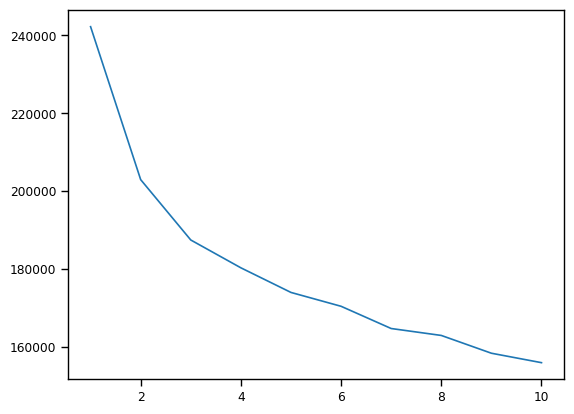

In [59]:
plt.plot(range(1,11),wcss)

In [60]:
X = data_clean.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [61]:
y_means

array([0, 0, 1, ..., 1, 0, 1])

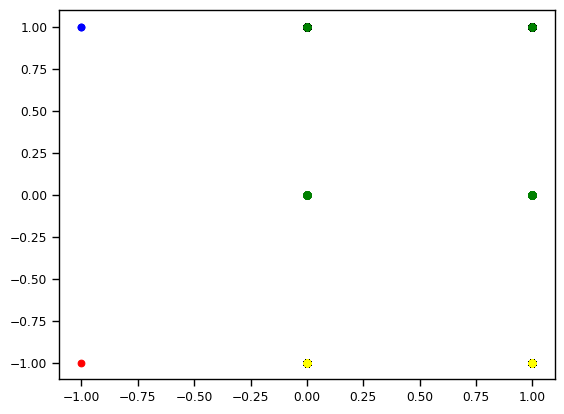

In [62]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

In [63]:
data_clean.head()

,default,housing,loan,poutcome,duration,previous,pdays,nr.employed,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,1,1,0,0.053070,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0.030297,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,-1,1,0,0.045954,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,1,1,0,0.030704,0.0,1.0,0.859735,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1,1,-1,0,0.062424,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0


In [64]:
data_clean.dtypes

default                            int64
housing                            int64
loan                               int64
poutcome                           int64
duration                         float64
previous                         float64
pdays                            float64
nr.employed                      float64
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single                     uint8
education_basic.4y                 uint8
education_basic.6y                 uint8
education_basic.

In [66]:
y_means.shape

(41188,)

In [67]:
y_means

array([0, 0, 1, ..., 1, 0, 1])

In [70]:
X

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., -1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1., -1.,  1., ...,  0.,  0.,  0.]])

In [72]:
np.unique(y_means)

array([0, 1, 2, 3])

In [73]:
data_cluster.head()

,default,housing,loan,poutcome,duration,previous,pdays,nr.employed,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,1,1,0,0.053070,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,0.030297,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,-1,1,0,0.045954,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,1,1,0,0.030704,0.0,1.0,0.859735,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1,1,-1,0,0.062424,0.0,1.0,0.859735,0,0,...,0,1,0,0,0,0,1,0,0,0


In [74]:
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [76]:
data_org = data

In [77]:
data_org.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [78]:
data_org['cluster'] = y_means.tolist()

In [79]:
data_org.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2


<AxesSubplot:xlabel='count', ylabel='cluster'>

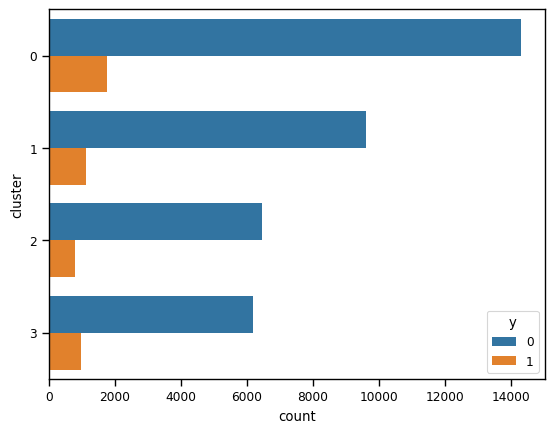

In [80]:
sns.countplot(data=data_org, y="cluster", hue="y")

<AxesSubplot:xlabel='cluster', ylabel='age'>

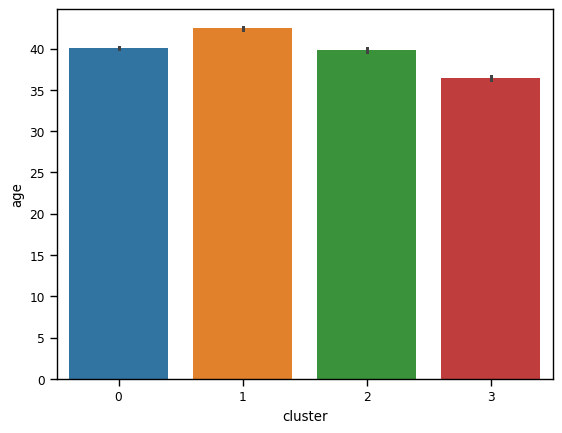

In [81]:
sns.barplot(data=data_org, x="cluster", y="age")

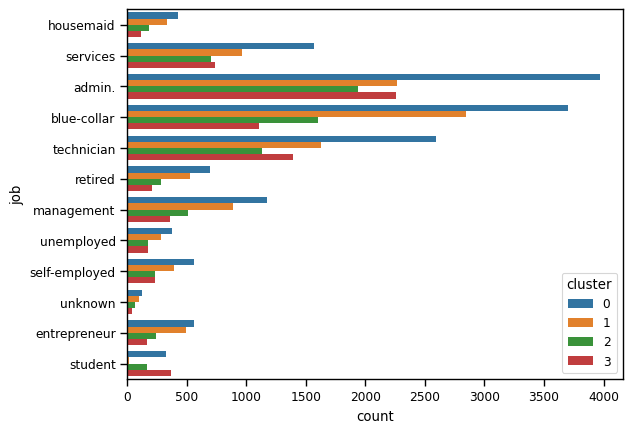

In [82]:
sns.countplot(data=data_org, y='job', hue='cluster');

In [83]:
data_org['cluster'].value_counts()

0    16065
1    10733
2     7238
3     7152
Name: cluster, dtype: int64

<AxesSubplot:xlabel='count', ylabel='marital'>

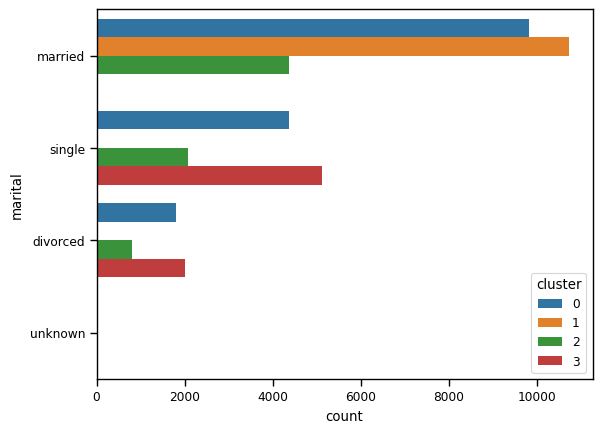

In [84]:
sns.countplot(data=data_org, y="marital", hue="cluster")

<AxesSubplot:xlabel='count', ylabel='education'>

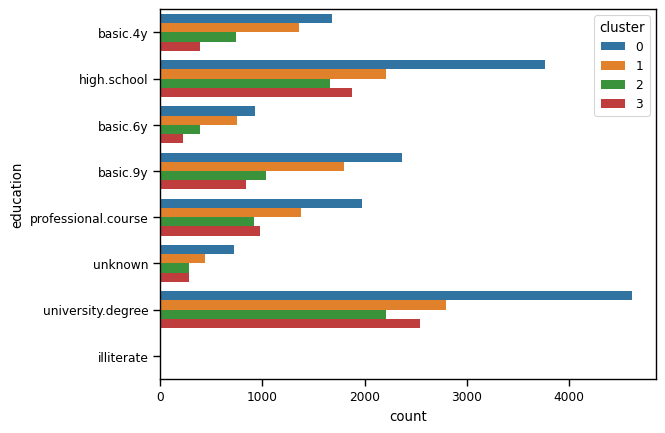

In [85]:
sns.countplot(data=data_org, y="education", hue="cluster")

<AxesSubplot:xlabel='count', ylabel='default'>

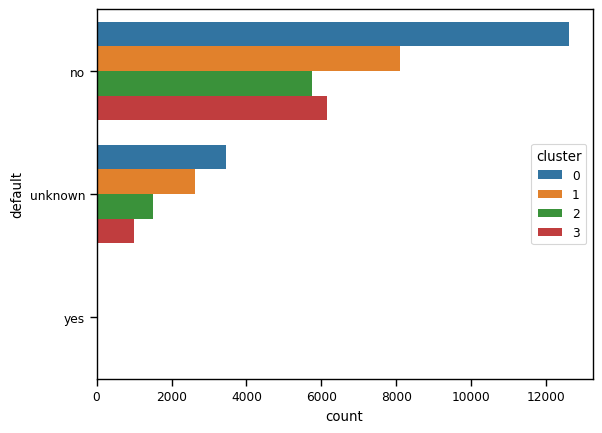

In [86]:
sns.countplot(data=data_org, y="default", hue="cluster")

<AxesSubplot:xlabel='count', ylabel='housing'>

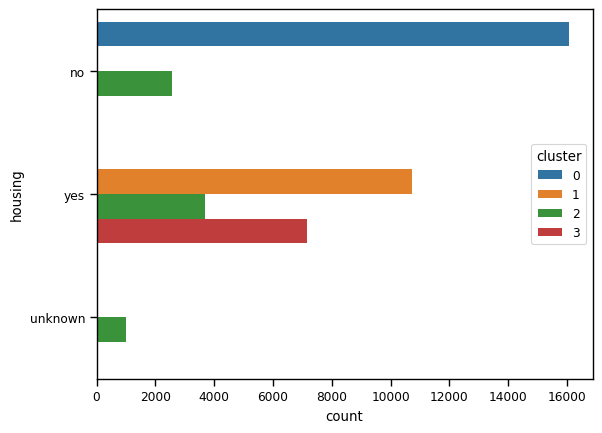

In [87]:
sns.countplot(data=data_org, y="housing", hue="cluster")

<AxesSubplot:xlabel='count', ylabel='loan'>

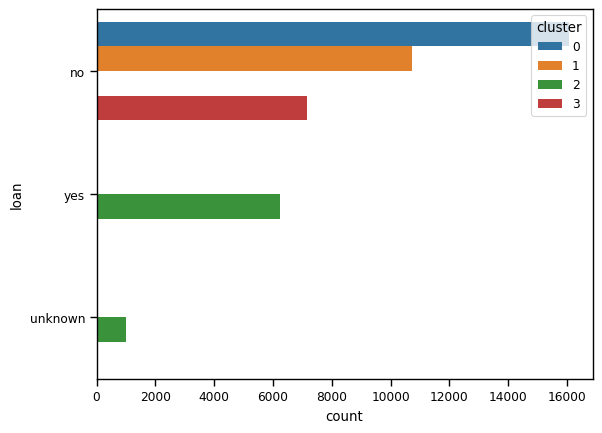

In [88]:
sns.countplot(data=data_org, y="loan", hue="cluster")

<AxesSubplot:xlabel='count', ylabel='contact'>

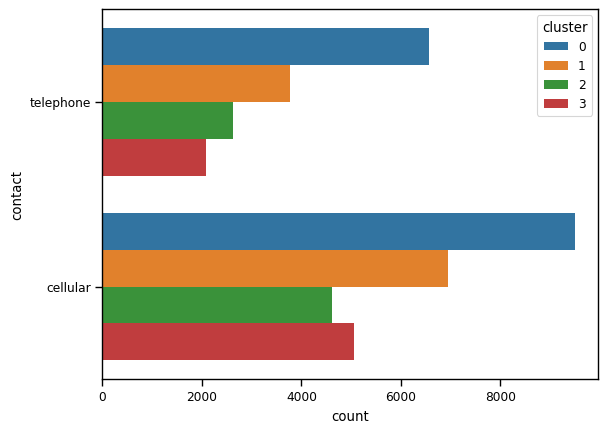

In [89]:
sns.countplot(data=data_org, y="contact", hue="cluster")

<AxesSubplot:xlabel='count', ylabel='month'>

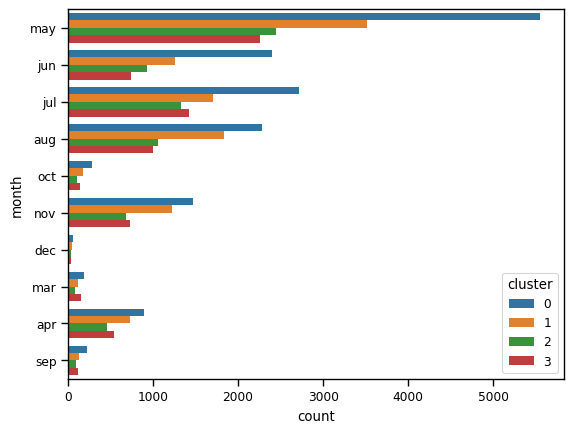

In [90]:
sns.countplot(data=data_org, y="month", hue="cluster")

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

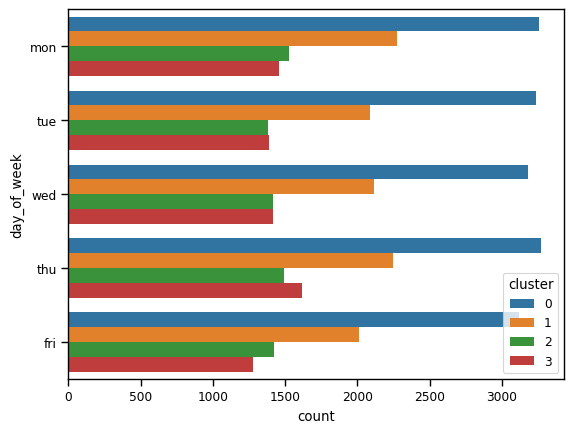

In [91]:
sns.countplot(data=data_org, y="day_of_week", hue="cluster")

<AxesSubplot:xlabel='count', ylabel='poutcome'>

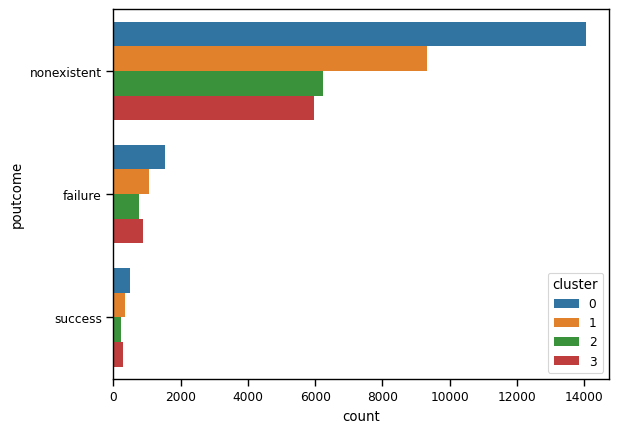

In [92]:
sns.countplot(data=data_org, y="poutcome", hue="cluster")

In [93]:
data_org.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
cluster             int64
dtype: object

<AxesSubplot:xlabel='cluster', ylabel='duration'>

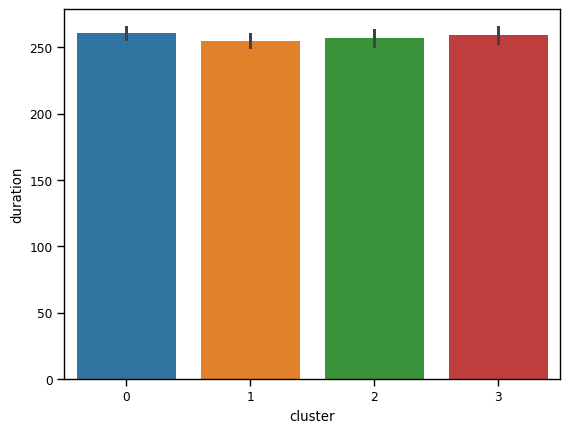

In [94]:
sns.barplot(data=data_org, x="cluster", y="duration")

<AxesSubplot:xlabel='cluster', ylabel='campaign'>

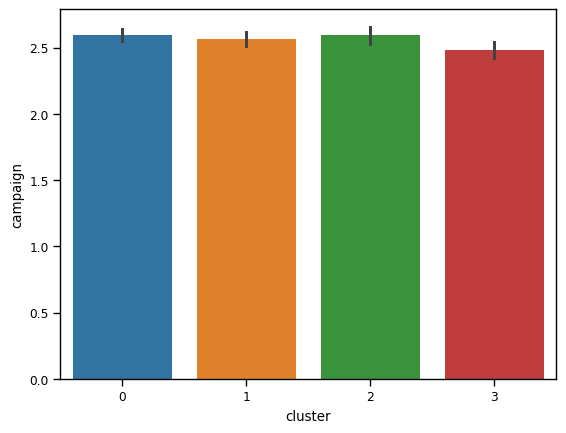

In [95]:
sns.barplot(data=data_org, x="cluster", y="campaign")

<AxesSubplot:xlabel='cluster', ylabel='pdays'>

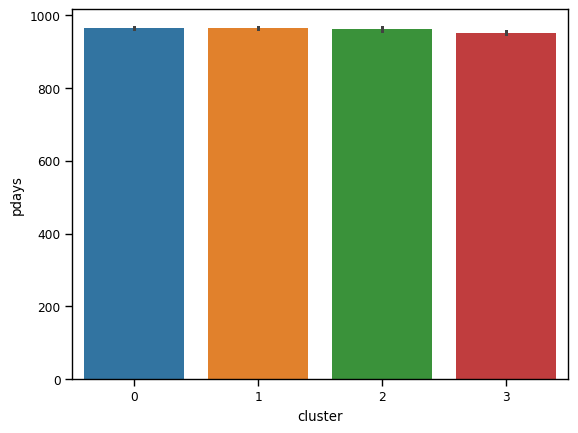

In [96]:
sns.barplot(data=data_org, x="cluster", y="pdays")

<AxesSubplot:xlabel='cluster', ylabel='previous'>

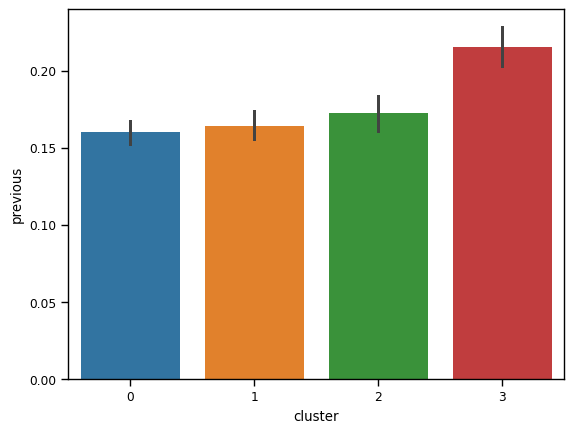

In [97]:
sns.barplot(data=data_org, x="cluster", y="previous")

<AxesSubplot:xlabel='cluster', ylabel='emp.var.rate'>

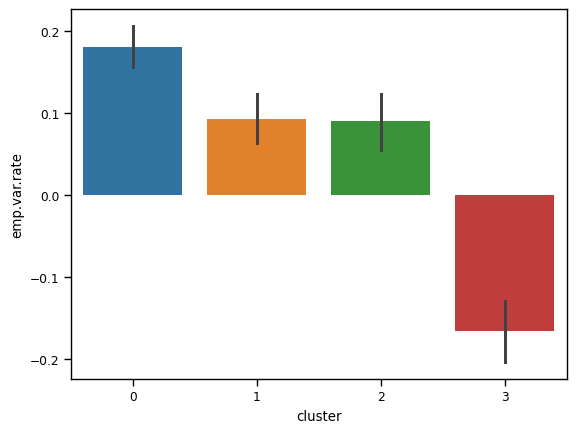

In [98]:
sns.barplot(data=data_org, x="cluster", y="emp.var.rate")

<AxesSubplot:xlabel='cluster', ylabel='cons.price.idx'>

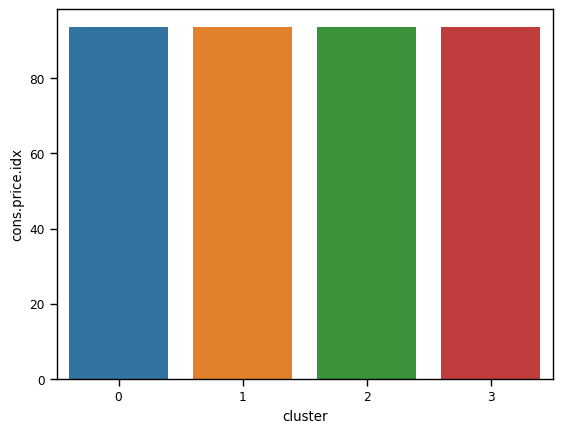

In [99]:
sns.barplot(data=data_org, x="cluster", y="cons.price.idx")

<AxesSubplot:xlabel='cluster', ylabel='cons.conf.idx'>

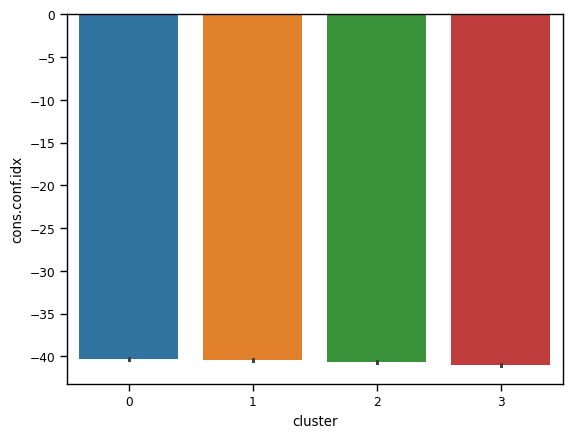

In [100]:
sns.barplot(data=data_org, x="cluster", y="cons.conf.idx")

<AxesSubplot:xlabel='cluster', ylabel='euribor3m'>

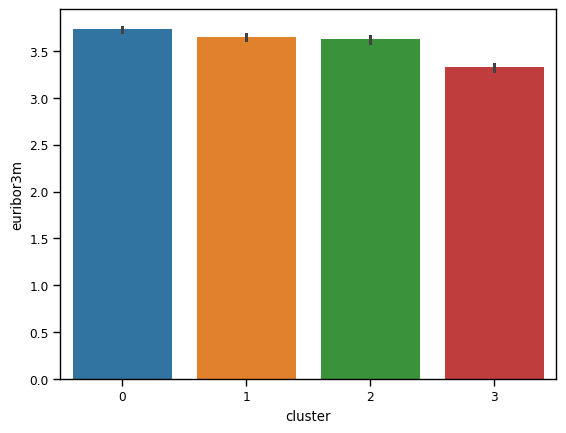

In [101]:
sns.barplot(data=data_org, x="cluster", y="euribor3m")

<AxesSubplot:xlabel='cluster', ylabel='nr.employed'>

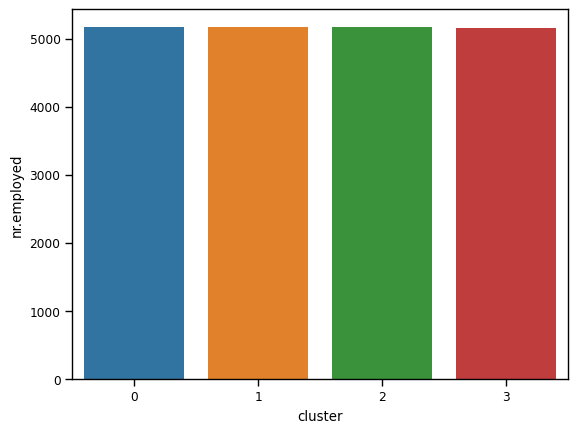

In [102]:
sns.barplot(data=data_org, x="cluster", y="nr.employed")

In [103]:
pd.crosstab(data_org['cluster'], data_org['y'])

y,0,1
cluster,,
0,14313,1752
1,9604,1129
2,6448,790
3,6183,969
